In [25]:
using Pkg
using DataFrames
using CSV
using Plots
using GLM
using StatsBase
using Lathe
using MLBase
using ClassImbalance
using ROCAnalysis
using PyCall
sklearn = pyimport("sklearn.metrics")

PyObject <module 'sklearn.metrics' from '/Users/jnapolitano/venvs/finance/lib/python3.9/site-packages/sklearn/metrics/__init__.py'>

In [26]:
function load_csv() 

    df = DataFrame(CSV.File("./Churn_Modelling.csv")) 
    return df 
end

load_csv (generic function with 1 method)

# Data Exploration

In [27]:
marketing_df = load_csv()
first(marketing_df,5)

5×14 typename(DataFrame). Omitted printing of 8 columns
│ Row │ RowNumber │ CustomerId │ Surname  │ CreditScore │ Geography │ Gender  │
│     │ Int64     │ Int64      │ String31 │ Int64       │ String7   │ String7 │
├─────┼───────────┼────────────┼──────────┼─────────────┼───────────┼─────────┤
│ 1   │ 1         │ 15634602   │ Hargrave │ 619         │ France    │ Female  │
│ 2   │ 2         │ 15647311   │ Hill     │ 608         │ Spain     │ Female  │
│ 3   │ 3         │ 15619304   │ Onio     │ 502         │ France    │ Female  │
│ 4   │ 4         │ 15701354   │ Boni     │ 699         │ France    │ Female  │
│ 5   │ 5         │ 15737888   │ Mitchell │ 850         │ Spain     │ Female  │

In [28]:
println(size(marketing_df))
describe(marketing_df)

(10000, 14)


14×8 typename(DataFrame). Omitted printing of 3 columns
│ Row │ variable        │ mean      │ min      │ median    │ max       │
│     │ Symbol          │ Union…    │ Any      │ Union…    │ Any       │
├─────┼─────────────────┼───────────┼──────────┼───────────┼───────────┤
│ 1   │ RowNumber       │ 5000.5    │ 1        │ 5000.5    │ 10000     │
│ 2   │ CustomerId      │ 1.56909e7 │ 15565701 │ 1.56907e7 │ 15815690  │
│ 3   │ Surname         │           │ Abazu    │           │ Zuyeva    │
│ 4   │ CreditScore     │ 650.529   │ 350      │ 652.0     │ 850       │
│ 5   │ Geography       │           │ France   │           │ Spain     │
│ 6   │ Gender          │           │ Female   │           │ Male      │
│ 7   │ Age             │ 38.9218   │ 18       │ 37.0      │ 92        │
│ 8   │ Tenure          │ 5.0128    │ 0        │ 5.0       │ 10        │
│ 9   │ Balance         │ 76485.9   │ 0.0      │ 97198.5   │ 2.50898e5 │
│ 10  │ NumOfProducts   │ 1.5302    │ 1        │ 1.0       │ 4         │
│ 11  │ HasCrCard       │ 0.7055    │ 0        │ 1.0       │ 1         │
│ 12  │ IsActiveMember  │ 0.5151    │ 0        │ 1.0       │ 1         │
│ 13  │ EstimatedSalary │ 1.0009e5  │ 11.58    │ 1.00194e5 │ 1.99992e5 │
│ 14  │ Exited          │ 0.2037    │ 0        │ 0.0       │ 1         │

In [29]:
# Check column names
names(marketing_df)

14-element Vector{Symbol}:
 :RowNumber
 :CustomerId
 :Surname
 :CreditScore
 :Geography
 :Gender
 :Age
 :Tenure
 :Balance
 :NumOfProducts
 :HasCrCard
 :IsActiveMember
 :EstimatedSalary
 :Exited

### Check Class Imbalance


In [30]:
# Count the classes
countmap(marketing_df.Exited)

Dict{Int64, Int64} with 2 entries:
  0 => 7963
  1 => 2037

## Data Preprocessing


### One Hot Encoding

In [31]:
# One hot encoding
Lathe.preprocess.OneHotEncode(marketing_df,:Geography)
Lathe.preprocess.OneHotEncode(marketing_df,:Gender)
select!(marketing_df, Not([:RowNumber, :CustomerId,:Surname,:Geography,:Gender,:Male]))


10000×13 typename(DataFrame). Omitted printing of 7 columns
│ Row   │ CreditScore │ Age   │ Tenure │ Balance   │ NumOfProducts │ HasCrCard │
│       │ Int64       │ Int64 │ Int64  │ Float64   │ Int64         │ Int64     │
├───────┼─────────────┼───────┼────────┼───────────┼───────────────┼───────────┤
│ 1     │ 619         │ 42    │ 2      │ 0.0       │ 1             │ 1         │
│ 2     │ 608         │ 41    │ 1      │ 83807.9   │ 1             │ 0         │
│ 3     │ 502         │ 42    │ 8      │ 1.59661e5 │ 3             │ 1         │
│ 4     │ 699         │ 39    │ 1      │ 0.0       │ 2             │ 0         │
│ 5     │ 850         │ 43    │ 2      │ 1.25511e5 │ 1             │ 1         │
│ 6     │ 645         │ 44    │ 8      │ 1.13756e5 │ 2             │ 1         │
│ 7     │ 822         │ 50    │ 7      │ 0.0       │ 2             │ 1         │
│ 8     │ 376         │ 29    │ 4      │ 1.15047e5 │ 4             │ 1         │
│ 9     │ 501         │ 44    │ 4      │ 1.42051e5 │ 2             │ 0         │
│ 10    │ 684         │ 27    │ 2      │ 1.34604e5 │ 1             │ 1         │
⋮
│ 9990  │ 841         │ 28    │ 4      │ 0.0       │ 2             │ 1         │
│ 9991  │ 714         │ 33    │ 3      │ 35016.6   │ 1             │ 1         │
│ 9992  │ 597         │ 53    │ 4      │ 88381.2   │ 1             │ 1         │
│ 9993  │ 726         │ 36    │ 2      │ 0.0       │ 1             │ 1         │
│ 9994  │ 644         │ 28    │ 7      │ 1.5506e5  │ 1             │ 1         │
│ 9995  │ 800         │ 29    │ 2      │ 0.0       │ 2             │ 0         │
│ 9996  │ 771         │ 39    │ 5      │ 0.0       │ 2             │ 1         │
│ 9997  │ 516         │ 35    │ 10     │ 57369.6   │ 1             │ 1         │
│ 9998  │ 709         │ 36    │ 7      │ 0.0       │ 1             │ 0         │
│ 9999  │ 772         │ 42    │ 3      │ 75075.3   │ 2             │ 1         │
│ 10000 │ 792         │ 28    │ 4      │ 1.30143e5 │ 1             │ 1         │

### Split Train/and Test Data

In [32]:
# Train test split
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(marketing_df,.75);

## Build Model


In [33]:
# Train logistic regression model
fm = @formula(Exited ~ CreditScore + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary + Female + France + Spain)
logit = glm(fm, train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Exited ~ 1 + CreditScore + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary + Female + France + Spain

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                        Coef.   Std. Error       z  Pr(>|z|)     Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)      -1.90933      0.165007     -11.57    <1e-30  -2.23274      -1.58592
CreditScore      -0.000321917  0.000183184   -1.76    0.0789  -0.000680951   3.71172e-5
Age               0.040893     0.00165251    24.75    <1e-99   0.0376541     0.0441318
Tenure           -0.008864     0.00611129    -1.45    0.1469  -0.0208419     0.0031139
Balance           1.6

## Model Predictions and Evaluation

In [34]:
# Predict the target variable on test data 
prediction = predict(logit,test)

2406-element Vector{Union{Missing, Float64}}:
 0.24401107345293602
 0.1266535868551322
 0.031721959583257124
 0.11357816519004983
 0.24824114578495612
 0.024688755265128235
 0.14209354336141483
 0.18528877855991494
 0.15470097145575007
 0.25962439112051505
 0.15117890643161475
 0.2110682947689441
 0.06358192272871947
 ⋮
 0.24899439141513482
 0.23449577199293972
 0.13610439167926225
 0.1737934374110589
 0.1341643450975004
 0.5831068095078078
 0.2950497674661655
 0.04139159536998556
 0.06795785137729822
 0.017204995327274736
 0.12888818685657766
 0.15310112069144077

In [35]:
# Convert probability score to class
prediction_class = [if x < 0.5 0 else 1 end for x in prediction];

prediction_df = DataFrame(y_actual = test.Exited, y_predicted = prediction_class, prob_predicted = prediction);
prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted

2406-element BitVector:
 0
 1
 1
 1
 1
 1
 1
 1
 1
 0
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

## Prediction Accuracy

In [36]:
accuracy = mean(prediction_df.correctly_classified)

0.8100581878636741

### Confusion Matrix

In [37]:
# confusion_matrix = confusmat(2,prediction_df.y_actual, prediction_df.y_predicted)
confusion_matrix = MLBase.roc(prediction_df.y_actual, prediction_df.y_predicted)

ROCNums{Int64}
  p = 510
  n = 1896
  tp = 105
  tn = 1844
  fp = 52
  fn = 405


## Results

The model is estimating far to many exiting cases.  About 4 times the true value. 

In [38]:
fpr, tpr, thresholds = sklearn.roc_curve(prediction_df.y_actual, prediction_df.prob_predicted)

([0.0, 0.0, 0.0, 0.0005274261603375527, 0.0005274261603375527, 0.0010548523206751054, 0.0010548523206751054, 0.0015822784810126582, 0.0015822784810126582, 0.0026371308016877636  …  0.8829113924050633, 0.9066455696202531, 0.9066455696202531, 0.9193037974683544, 0.9193037974683544, 0.92457805907173, 0.92457805907173, 0.9725738396624473, 0.9725738396624473, 1.0], [0.0, 0.00196078431372549, 0.00392156862745098, 0.00392156862745098, 0.00784313725490196, 0.00784313725490196, 0.01568627450980392, 0.01568627450980392, 0.03137254901960784, 0.03137254901960784  …  0.9921568627450981, 0.9921568627450981, 0.9941176470588236, 0.9941176470588236, 0.996078431372549, 0.996078431372549, 0.9980392156862745, 0.9980392156862745, 1.0, 1.0], [1.8467335270755767, 0.8467335270755767, 0.8140811888019499, 0.8092555110984978, 0.7970873802691381, 0.79684704533007, 0.7719016175181805, 0.7709263202992206, 0.7060214606993195, 0.6994801619873218  …  0.04233143871590189, 0.03786940431261241, 0.037850945580692276, 0.03

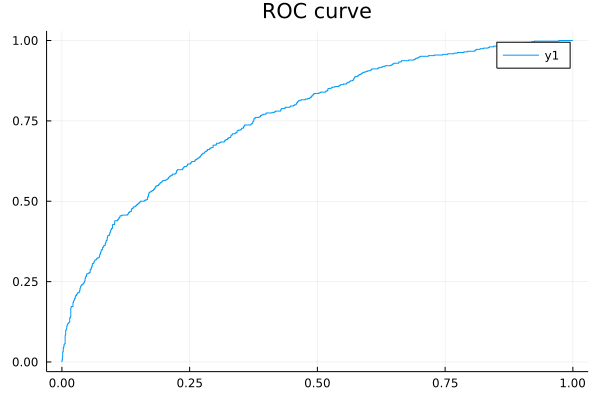

In [39]:
# Plot ROC curve
plot(fpr, tpr)
title!("ROC curve")

## The Class Imbalance Problem


In [40]:
# Count the classes
countmap(marketing_df.Exited)

Dict{Int64, Int64} with 2 entries:
  0 => 7963
  1 => 2037

### Smote to fix imbalance

In [41]:
X2, y2 =smote(marketing_df[!,[:CreditScore,:Age ,:Tenure, :Balance, :NumOfProducts, :HasCrCard, :IsActiveMember, :EstimatedSalary, :Female , :France, :Spain]], marketing_df.Exited, k = 5, pct_under = 150, pct_over = 200)
df_balanced = X2
df_balanced.Exited = y2;

df = df_balanced;

# Count the classes
countmap(df.Exited)

Dict{Int64, Int64} with 2 entries:
  0 => 6111
  1 => 6111

## Retest

In [42]:
# Train test split
train, test = TrainTestSplit(df,.75);

# Model Building
fm = @formula(Exited ~ CreditScore + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary + Female + France + Spain)
logit = glm(fm, train, Binomial(), ProbitLink())

# Predict the target variable on test data 
prediction = predict(logit,test)

# Convert probability score to class
prediction_class = [if x < 0.5 0 else 1 end for x in prediction];

prediction_df = DataFrame(y_actual = test.Exited, y_predicted = prediction_class, prob_predicted = prediction);
prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted


# Accuracy Score
accuracy = mean(prediction_df.correctly_classified)
print("Accuracy of the model is : ",accuracy)

# Confusion Matrix
confusion_matrix = MLBase.roc(prediction_df.y_actual, prediction_df.y_predicted)

Accuracy of the model is : 0.7169563791407019

ROCNums{Int64}
  p = 1550
  n = 1499
  tp = 1091
  tn = 1095
  fp = 404
  fn = 459


In [43]:
fpr, tpr, thresholds = sklearn.roc_curve(prediction_df.y_actual, prediction_df.prob_predicted)
# Plot ROC curve


([0.0, 0.0, 0.0, 0.00066711140760507, 0.00066711140760507, 0.00133422281521014, 0.00133422281521014, 0.0020013342228152103, 0.0020013342228152103, 0.00266844563042028  …  0.9846564376250834, 0.9893262174783188, 0.9893262174783188, 0.9913275517011341, 0.9913275517011341, 0.9973315543695798, 0.9986657771847899, 0.9993328885923949, 0.9993328885923949, 1.0], [0.0, 0.0006451612903225806, 0.0025806451612903226, 0.0025806451612903226, 0.005161290322580645, 0.005161290322580645, 0.007741935483870968, 0.007741935483870968, 0.00903225806451613, 0.00903225806451613  …  0.9980645161290322, 0.9980645161290322, 0.9987096774193548, 0.9987096774193548, 0.9993548387096775, 0.9993548387096775, 0.9993548387096775, 0.9993548387096775, 1.0, 1.0], [1.9907624292252022, 0.9907624292252022, 0.983731024429679, 0.97951657298985, 0.9730082291507035, 0.9713532719467679, 0.9629327481173712, 0.9604203755106321, 0.9593444340323958, 0.9584649467140461  …  0.06923199350115271, 0.06553287523911823, 0.06469253560487893, 

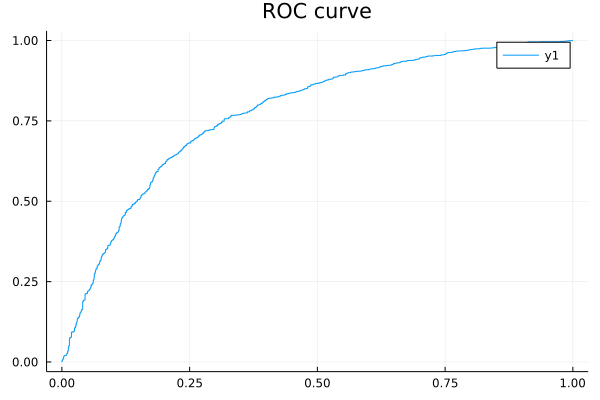

In [44]:
plot(fpr, tpr)
title!("ROC curve")

## Final Discussion

When accounting for class imbalance, the model accuracy is reduced to 71 percent from about 81 percent.  

While this seems counterintutive, the second model is actually a better model overall.  

The model with 81 percent accuracy is simply more accurate by chance.  The bin of exits to remains is far larger.  Thus, reported accuracy is higher. 

When the classes are normalized, we see a prediction of about 71 percent.  Confidently, I can say that this model would scale appropriately.  

The first model on the other hand would scale to about 25-30 percent accuracy. 